# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


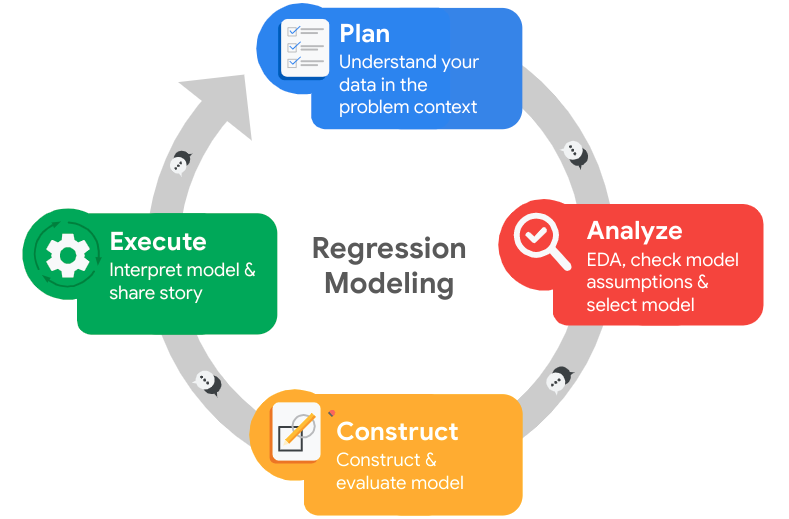

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

1. Stakeholders involved:
   - The Leadership team
   - Human Resources

2. To predict if an employee will leave the company or not.  This is to encourage employee retention and reduce cost of training new employees.


3. The following are my initial observations on exploring the data:
   - Some of the columns may need to be renamed as a result of spelling error, for comprehensible analysis
   - The salary and department columns may need to be encoded as the case needs it to be so.
   - There are no missing values.
   - The dataset contains duplicates which should be addressed.
   - Possible outliers detected under number_project and average_monthly_hours columns.
   - Columns that are binary are work_accident, left, and promotion_last_5years.
   - The dataset has no account for employees with less than 2years of experience.
   - There is an imbalance in between the number of employees who left and those who stayed where the majority class is about 83.4% of the dataset. 
   
   
4. - Google search engine
   - Capstone Project: Salifort Motors (EDA & RF/XGB) by YINGYING SUN, (https://www.kaggle.com/code/ying2sun/capstone-project-salifort-motors-eda-rf-xgb#Pace:-Plan-Stage.)
   

5. Ethical considerations that could be considered are:
   - a situation where certain departments may have been intentionally omitted from the dataset in a way that could misrepresent the overall situation or lead to biased or unfair conclusions because in this dataset, there are 7 departments listed 

   - The dataset addresses employees with minimum of 2 years experience and maximum of 7 years experience, there will be ethical concerns if others not captured are truely in the company database.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
### YOUR CODE HERE ###
column_names = df0.columns
print(column_names)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [7]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={'average_montly_hours':'average_monthly_hours', 'Work_accident': 'work_accident', 'left': 'has_left_company', 'Department': 'department'}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'has_left_company', 'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

It is necessary to check for  observations with missing data as such observation will have no meaningful effect on the overall modelling.  The isna() will be used to detect missing values.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
has_left_company         0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.  

In this context, it is near impossible for at least two observations to share exact same data points and hence are regarded as duplicates.  These duplicates can create unnecessary noise in the data modelling process.  For this reason duplicates will be removed to eliminate any noising effect as this can create unnecessary clutter during the modelling process.

In [9]:
# Check for duplicates
### YOUR CODE HERE ###
duplicates = df0[df0.duplicated()]
duplicates

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,has_left_company,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
duplicates

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,has_left_company,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,has_left_company,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
print(df0.shape)
print(df1.shape)

(14999, 10)
(11991, 10)


In [13]:
# renaming It department to IT
category_mapping = {'It':'IT', 'hr':'HR'}

df1['department'] = df1['department'].replace(category_mapping)
(df1[df1['department']=='IT']).head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,has_left_company,promotion_last_5years,department,salary
61,0.11,0.93,7,308,4,0,1,0,IT,medium
62,0.10,0.95,6,244,5,0,1,0,IT,medium
63,0.36,0.56,2,132,3,0,1,0,IT,medium
64,0.11,0.94,6,286,4,0,1,0,IT,medium
65,0.81,0.70,6,161,4,0,1,0,IT,medium


### Check outliers

Check for outliers in the data.

Text(0, 0.5, 'emloyee tenure')

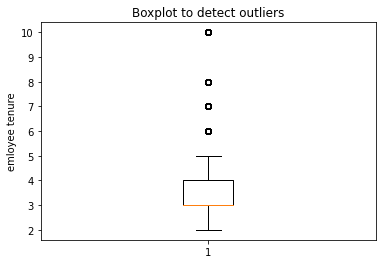

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.boxplot(df1['time_spend_company'])
plt.title('Boxplot to detect outliers')
plt.ylabel('emloyee tenure')

In [15]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
data = df1['time_spend_company']
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data < lower_bound) | (data > upper_bound)
print('Number of rows containing outliers:', np.sum(outliers))

Number of rows containing outliers: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

See below for response and explanation


1. The relationships between variables suggests that employees are leaving the company in the majority case as a result of unfavorable company work culture which should be addressed.

2. The general observations is that there is an imbalance between the overall amount of employees who left the company and those who stayed with the company with a 16.6% to 83.4% relationship respectively.

3. The following were the data transformations I did and the reason for the transformations:

   - Analyzing employee availability (previously calculated in percentages) based on department: The reason for this transformation is to see how employee availability is distributed based on the departments.

   - Analyzing the relationship between the 'number of projects' contributed and the 'average monthly hours' spent by employees:  The reason for this transformation is to study how the hours spent is affected by the number of projects contributed which in turn affects whether employees leff the company or stayed with the company.

   - Analyzing the relationship between the 'number of projects' contributed and the 'employee tenure':  The reason for this transformation is to study how the number of projects is distributed among employees based on their years of experience and how this affect their staying with the company or leaving the company.

   - Analyzing the relationship between 'employee tenure' and the 'average monthly hours' spent:  The reson for this transformation is to study what amount of time is being used by the employees while assessing their years of experience and how this in turn affect whether they stayed with the company or left the company.

   - Analyzing the relationship between 'employee tenure' and 'promotion':  The reason for this transformation is to study how employee who have worked for the company for over 5 years affects their being promoted which also one of the factors that could make employees to either leave the company or stay with the company.

   - Analyzing the relationship between 'employee tenure' and 'satisfaction level':  The reason for this transformation is to study which cadre of employees based on their experience derived job satisfaction or not which in turn affects their availability.

   - Analyzing the relationship between 'average monthly hours' spent and 'evaluation score': This is to study if the evaluation score is been affected by the average monthly hours spent by employees.

4. The following are purposes of EDA before constructing a predictive model:
   - It  helps the professionals to understand the nature of the data which helps to decide how the model is to be constructed.
   - With EDA, one can understand the data type involved and how to make use of it in the case of data transformation.
   - It ensures post analysis is in the right order or done correctly.
   - It helps professionals to avoid mistakes during the process of analyzing the data.

5. Resources used in helping to complete this project includeS:
   - Google search engine
   - Capstone Project: Salifort Motors (EDA & RF/XGB) by YINGYING SUN, (https://www.kaggle.com/code/ying2sun/capstone-project-salifort-motors-eda-rf-xgb#Pace:-Plan-Stage.)
   
6. Ethical considerations that could be considered are:
   - in this project activity, 7 departments were listed, if there are other departments in the company not listed in this project, there could be a contextual reason for the selection which could be based on observations among these departments otherwise there will be ethical concerns if these certain departments have been intentionally omitted from the dataset in a way that could misrepresent the overall situation or lead to biased or unfair conclusions. 

   - The dataset addresses employees with minimum of 2 years experience and maximum of 7 years experience, there will be ethical concerns if others not captured are truely in the company database.

Additional work

In [16]:
df1[['satisfaction_level', 'has_left_company']]

# Getting the mean satisfaction level
mean_satisfaction_level = round(df1['satisfaction_level'].mean(), 2)

# working with the mean satisfaction level
num_mean_satisfaction_level = len(df1[df1['satisfaction_level'] == mean_satisfaction_level])
num_over_mean_satisfaction_level = len(df1[df1['satisfaction_level'] > mean_satisfaction_level])
num_under_mean_satisfaction_level = len(df1[df1['satisfaction_level'] < mean_satisfaction_level])

# Getting the number of reported minimum and maximum satisfaction level
minimum_satisfaction_level = df1['satisfaction_level'].min()
maximum_satisfaction_level = df1['satisfaction_level'].max()

minimum_satisfaction_level_mask = df1['satisfaction_level'] == minimum_satisfaction_level # boolean masking
num_min_satisfaction_level = len(df1[minimum_satisfaction_level_mask])

maximum_satisfaction_level_mask = df1['satisfaction_level'] == maximum_satisfaction_level # boolean masking
num_max_satisfaction_level = len(df1[maximum_satisfaction_level_mask])


# Getting and working with the satisfaction midpoint value
satisfaction_mid_point_value = 0.5

num_midpoint_value = len(df1[df1['satisfaction_level'] == satisfaction_mid_point_value])
num_over_midpoint_value = len(df1[df1['satisfaction_level'] > satisfaction_mid_point_value])
num_under_midpoint_value = len(df1[df1['satisfaction_level'] < satisfaction_mid_point_value])

# Experimenting with the satisfaction mid point value
print('The number of employees with reported satisfaction level of 0.5 is:', num_midpoint_value)
print('The number of employees with reported satisfaction level less 0.5 is:', num_under_midpoint_value)
print('The number of employees with reported satisfaction level over 0.5 is:', num_over_midpoint_value)

left_condition1 = (df1['satisfaction_level'] == satisfaction_mid_point_value) & (df1['has_left_company'] == 1)
filtered_df = df1[left_condition1]
num_rows_meeting_condition = len(filtered_df)
print('The number of employees with reported satisfaction level of 0.5 who left is:', num_rows_meeting_condition)

stayed_condition1 = (df1['satisfaction_level'] == satisfaction_mid_point_value) & (df1['has_left_company'] == 0)
filtered_df = df1[stayed_condition1]
num_rows_meeting_condition = len(filtered_df)
print('The number of employees with reported satisfaction level of 0.5 who stayed is:', num_rows_meeting_condition)


left_condition2 = (df1['satisfaction_level'] < satisfaction_mid_point_value) & (df1['has_left_company'] == 1)
filtered_df = df1[left_condition2]
num_rows_meeting_condition = len(filtered_df)
print('The number of employees with reported satisfaction level less than 0.5 who left is:', num_rows_meeting_condition)

stayed_condition2 = (df1['satisfaction_level'] < satisfaction_mid_point_value) & (df1['has_left_company'] == 0)
filtered_df = df1[stayed_condition2]
num_rows_meeting_condition = len(filtered_df)
print('The number of employees with reported satisfaction level less than 0.5 who stayed is:', num_rows_meeting_condition)

left_condition3 = (df1['satisfaction_level'] > satisfaction_mid_point_value) & (df1['has_left_company'] == 1)
filtered_df = df1[left_condition3]
num_rows_meeting_condition = len(filtered_df)
print('The number of employees with satisfaction level greater than 0.5 who left is:', num_rows_meeting_condition)

stayed_condition3 = (df1['satisfaction_level'] > satisfaction_mid_point_value) & (df1['has_left_company'] == 0)
filtered_df = df1[stayed_condition3]
num_rows_meeting_condition = len(filtered_df)
print('The number of employees with satisfaction level greater than 0.5 who stayed is:', num_rows_meeting_condition)

print('==================================================================================')
print('The minimum satisfaction level is :', minimum_satisfaction_level)
print('The maximum satisfaction level is :', maximum_satisfaction_level)
print('The mean satisfaction level is :', mean_satisfaction_level)
print('The number of employees with reported minimum satisfaction level is: ', num_min_satisfaction_level)
print('The number of employees with reported maximum satisfaction level is: ', num_max_satisfaction_level)
print('==================================================================================')

print('The number of employees with reported mean satisfaction level is: ', num_mean_satisfaction_level)
print('The number of employees with reported less mean satisfaction level is: ', num_under_mean_satisfaction_level)
print('The number of employees with reported over mean satisfaction level is: ', num_over_mean_satisfaction_level)

min_base_condition1 = (df1['satisfaction_level'] == minimum_satisfaction_level) & (df1['has_left_company'] == 1)
filtered_df = df1[min_base_condition1]
num_rows_meeting_condition = len(filtered_df)
print('The number of employees with minimum satisfaction level who left is:', num_rows_meeting_condition)

min_base_condition2 = (df1['satisfaction_level'] == minimum_satisfaction_level) & (df1['has_left_company'] == 0)
filtered_df = df1[min_base_condition2]
num_rows_meeting_condition = len(filtered_df)
print('The number of employees with minimum satisfaction level who stayed is:', num_rows_meeting_condition)

max_base_condition1 = (df1['satisfaction_level'] == maximum_satisfaction_level) & (df1['has_left_company'] == 1)
filtered_df = df1[max_base_condition1]
num_rows_meeting_condition = len(filtered_df)
print('The number of employees with maximum satisfaction level who left is:', num_rows_meeting_condition)

max_base_condition2 = (df1['satisfaction_level'] == maximum_satisfaction_level) & (df1['has_left_company'] == 0)
filtered_df = df1[max_base_condition2]
num_rows_meeting_condition = len(filtered_df)
print('The number of employees with maximum satisfaction level who stayed is:', num_rows_meeting_condition)

print('==================================================================================')

left_condition5 = (df1['satisfaction_level'] == mean_satisfaction_level) & (df1['has_left_company'] == 1)
filtered_df = df1[left_condition5]
num_rows_meeting_condition = len(filtered_df)
print('The number of employees with average satisfaction level who left is:', num_rows_meeting_condition)

stayed_condition5 = (df1['satisfaction_level'] == mean_satisfaction_level) & (df1['has_left_company'] == 0)
filtered_df = df1[stayed_condition5]
num_rows_meeting_condition = len(filtered_df)
print('The number of employees with average satisfaction level who stayed is:', num_rows_meeting_condition)

left_condition6 = (df1['satisfaction_level'] > mean_satisfaction_level) & (df1['has_left_company'] == 1)
filtered_df = df1[left_condition6]
num_rows_meeting_condition = len(filtered_df)
print('The number of employees with above average satisfaction level who left is:', num_rows_meeting_condition)

stayed_condition6 = (df1['satisfaction_level'] > mean_satisfaction_level) & (df1['has_left_company'] == 0)
filtered_df = df1[stayed_condition6]
num_rows_meeting_condition = len(filtered_df)
print('The number of employees with above average satisfaction level who stayed is:', num_rows_meeting_condition)

left_condition7 = (df1['satisfaction_level'] < mean_satisfaction_level) & (df1['has_left_company'] == 1)
filtered_df = df1[left_condition7]
num_rows_meeting_condition = len(filtered_df)
print('The number of employees with less average satisfaction level who left is:', num_rows_meeting_condition)

stayed_condition7 = (df1['satisfaction_level'] < mean_satisfaction_level) & (df1['has_left_company'] == 0)
filtered_df = df1[stayed_condition7]
num_rows_meeting_condition = len(filtered_df)
print('The number of employees with less average satisfaction level who stayed is:', num_rows_meeting_condition)



# The above codes could be modified or refactored to avoid redundancy

The number of employees with reported satisfaction level of 0.5 is: 200
The number of employees with reported satisfaction level less 0.5 is: 3184
The number of employees with reported satisfaction level over 0.5 is: 8607
The number of employees with reported satisfaction level of 0.5 who left is: 2
The number of employees with reported satisfaction level of 0.5 who stayed is: 198
The number of employees with reported satisfaction level less than 0.5 who left is: 1412
The number of employees with reported satisfaction level less than 0.5 who stayed is: 1772
The number of employees with satisfaction level greater than 0.5 who left is: 577
The number of employees with satisfaction level greater than 0.5 who stayed is: 8030
The minimum satisfaction level is : 0.09
The maximum satisfaction level is : 1.0
The mean satisfaction level is : 0.63
The number of employees with reported minimum satisfaction level is:  110
The number of employees with reported maximum satisfaction level is:  100
Th

In [17]:
# Using masking to check for correctness of the above codes

mean_satisfaction_level = df1['satisfaction_level'].mean()

mean_satisfaction_level_mask = df1['satisfaction_level'] == 0.63

filtered_rows = df1[mean_satisfaction_level_mask]
filtered_rows

left_condition5 = (df1['satisfaction_level'] == 0.63) & (df1['has_left_company'] == 1)
filtered_df = filtered_rows[left_condition5]
num_rows_meeting_condition = len(filtered_df)
print('The number of employees with average satisfaction level who left is:', num_rows_meeting_condition)

The number of employees with average satisfaction level who left is: 4


From the above result, the following were observed:

1. the minimum satisfaction level is 0.09 while the maximum satisfaction level is 1.00. 

2. 100% of those with minimum satisfaction level all left the company while 100% of those who reported maximum satisfaction level all stayed.

3. about 2.2% of those with mean satisfaction level left the company while 97.8% stayed.

4. about 26.9% of those with satisfaction level below the mean left the company while 73.1% stayed.

5. about 8.4% of those with satisfaction level above the mean left the company while 91.6% stayed.

6. additionally, I decided to use a mid point value (0.5) as the satisfaction level ranges from 0 to 1.  From the report:

   i.   1% of those with reported satisfaction level of 0.5 left while 99% stayed.

   ii.  4.3% of those with reported satisfaction level less than 0.5 left the company while 55.7% stayed

   iii. 6.7% of those with reported satisfaction level greater than 0.5 left the company while 93.3% stayed

There is a possibility decider that the overall company experience may have been partly responsible for employee turnover.  I will take that emphasis should be looked at the possible reasons for low employee satisfaction level especially judging from the fact that 100% of those with minimum satisfaction level all left the company.  Probably the company may need to revisit and work on its work and work related culture.


In [18]:
df1[['last_evaluation', 'has_left_company']]

# Getting the mean, max, and min evaluation score
mean_evaluation = round(df1['last_evaluation'].mean(), 2)
min_evaluation = df1['last_evaluation'].min()
max_evaluation = df1['last_evaluation'].max()

# Getting the mean evaluation score
mean_evaluation = round(df1['last_evaluation'].mean(), 2)

# working with the mean evaluation score
num_mean_plus_evaluation = len(df1[df1['last_evaluation'] >= mean_evaluation])
# num_over_mean_evaluation = len(df1[df1['last_evaluation'] > mean_evaluation])
num_under_mean_evaluation = len(df1[df1['last_evaluation'] < mean_evaluation])

# Getting the number of reported minimum and maximum evaluation score
min_evaluation_mask = df1['last_evaluation'] == min_evaluation # boolean masking
num_min_evaluation = len(df1[min_evaluation_mask])

max_evaluation_mask = df1['last_evaluation'] == max_evaluation # boolean masking
num_max_evaluation = len(df1[max_evaluation_mask])


print('The minimum evaluation score is :', min_evaluation)
print('The maximum evaluation score is :', max_evaluation)
print('The mean evaluation score is :', mean_evaluation)
print('==================================================================================')
print('The number of employees with minimum evaluation score is:', num_min_evaluation)
print('The number of employees with maximum evaluation score is:', num_max_evaluation)
print('The number of employees with at least the mean evaluation score is:', num_mean_plus_evaluation)
print('The number of employees with the mean evaluation score less than the mean is:', num_under_mean_evaluation)
print('==================================================================================')


# Initialize counters for different conditions
employees_with_at_least_average_evaluation_and_left = 0
employees_with_at_least_average_evaluation_and_stayed = 0
employees_with_less_than_average_evaluation_and_left = 0
employees_with_less_than_average_evaluation_and_stayed = 0

employees_with_minimum_evaluation_and_left = 0
employees_with_minimum_evaluation_and_stayed = 0
employees_with_evaluation_above_minimum_and_left = 0
employees_with_evaluation_above_minimum_and_stayed = 0
employees_with_maximum_evaluation_and_left = 0
employees_with_maximum_evaluation_and_stayed = 0
employees_with_evaluation_below_maximum_and_left = 0
employees_with_evaluation_below_maximum_and_stayed = 0





# Loop through the DataFrame and count employees based on conditions
for index, row in df1.iterrows():
    evaluation_score = row['last_evaluation']
    has_left_company = row['has_left_company']
    
    if evaluation_score >= mean_evaluation:
        if has_left_company == 1:
            employees_with_at_least_average_evaluation_and_left += 1
        else:
            employees_with_at_least_average_evaluation_and_stayed += 1
            
    if evaluation_score < mean_evaluation:
        if has_left_company == 1:
            employees_with_less_than_average_evaluation_and_left += 1
        else:
            employees_with_less_than_average_evaluation_and_stayed += 1
    
    if evaluation_score == min_evaluation:
        if has_left_company == 1:
            employees_with_minimum_evaluation_and_left += 1
        else:
            employees_with_minimum_evaluation_and_stayed += 1
            
    if evaluation_score > min_evaluation:
        if has_left_company == 1:
            employees_with_evaluation_above_minimum_and_left += 1
        else:
            employees_with_evaluation_above_minimum_and_stayed += 1
    
    if evaluation_score == max_evaluation:
        if has_left_company == 1:
            employees_with_maximum_evaluation_and_left += 1
        else:
            employees_with_maximum_evaluation_and_stayed += 1
            
    if evaluation_score < max_evaluation:
        if has_left_company == 1:
            employees_with_evaluation_below_maximum_and_left += 1
        else:
            employees_with_evaluation_below_maximum_and_stayed += 1


# Print the results
print('The number of employees with minimum evaluation score who left is:', employees_with_minimum_evaluation_and_left)
print('The number of employees with minimum evaluation score who stayed is:', employees_with_minimum_evaluation_and_stayed)
print('The number of employees with evaluation score above minimum who left is:', employees_with_evaluation_above_minimum_and_left)
print('The number of employees with evaluation score above minimum who stayed is:', employees_with_evaluation_above_minimum_and_stayed)
print('The number of employees with maximum evaluation score who left is:', employees_with_maximum_evaluation_and_left)
print('The number of employees with maximum evaluation score who stayed is:', employees_with_maximum_evaluation_and_stayed)
print('The number of employees with evaluation score below maximum who left is:', employees_with_evaluation_below_maximum_and_left)
print('The number of employees with evaluation score below maximum who stayed is:', employees_with_evaluation_below_maximum_and_stayed)
print('==================================================================================')
print('The number of employees with at least average evaluation score who left is:', employees_with_at_least_average_evaluation_and_left)
print('The number of employees with at least average evaluation score who stayed is:', employees_with_at_least_average_evaluation_and_stayed)
print('The number of employees with evaluation score less than average who left is:', employees_with_less_than_average_evaluation_and_left)
print('The number of employees with evaluation score less than average who stayed is:', employees_with_less_than_average_evaluation_and_stayed)


The minimum evaluation score is : 0.36
The maximum evaluation score is : 1.0
The mean evaluation score is : 0.72
The number of employees with minimum evaluation score is: 19
The number of employees with maximum evaluation score is: 200
The number of employees with at least the mean evaluation score is: 6073
The number of employees with the mean evaluation score less than the mean is: 5918
The number of employees with minimum evaluation score who left is: 0
The number of employees with minimum evaluation score who stayed is: 19
The number of employees with evaluation score above minimum who left is: 1991
The number of employees with evaluation score above minimum who stayed is: 9981
The number of employees with maximum evaluation score who left is: 94
The number of employees with maximum evaluation score who stayed is: 106
The number of employees with evaluation score below maximum who left is: 1897
The number of employees with evaluation score below maximum who stayed is: 9894
The numb

Every company has her threshold value on work performance.  In this scenario, there was no threshold stated, hence for this reason there won't be a confirmed reason on employee's reason for leaving based on evaluation. However, based on the data provided, below are the following findings:

1. the minimum evaluation score is 0.36 while the maximum satisfaction level is 1.00. 

2. 100% out of the 19 employees with minimum evaluation score stayed in the company while 47% of those who had maximum evaluation score all left the company as opposed to 53% who stayed.

3. about 17.7% of those with at least mean evaluation score left the company while 82.3% stayed.

4. about 15.5% of those with evaluation score below the mean left the company while 84.5% stayed.

The conclusion here is that based on the evaluation score, employees who left may have been relieved of their duty as they may have performed below company expectation while some may have left on their own will probably due to the inability to cope with the work activities.

In [19]:
print(df1.groupby('number_project').size())
print('==================================================================================')


# Initialize counters for different conditions
employees_that_contributed_to_2_projects_and_left = 0
employees_that_contributed_to_2_projects_and_stayed = 0
employees_that_contributed_to_3_projects_and_left = 0
employees_that_contributed_to_3_projects_and_stayed = 0
employees_that_contributed_to_4_projects_and_left = 0
employees_that_contributed_to_4_projects_and_stayed = 0
employees_that_contributed_to_5_projects_and_left = 0
employees_that_contributed_to_5_projects_and_stayed = 0
employees_that_contributed_to_6_projects_and_left = 0
employees_that_contributed_to_6_projects_and_stayed = 0
employees_that_contributed_to_7_projects_and_left = 0
employees_that_contributed_to_7_projects_and_stayed = 0

# Loop through the DataFrame and count employees based on conditions
for index, row in df1.iterrows():
    number_of_project= row['number_project']
    has_left_company = row['has_left_company']
    
    if number_of_project == 2:
        if has_left_company == 1:
            employees_that_contributed_to_2_projects_and_left += 1
        else:
            employees_that_contributed_to_2_projects_and_stayed += 1
        
    if number_of_project == 3:
        if has_left_company == 1:
            employees_that_contributed_to_3_projects_and_left += 1
        else:
            employees_that_contributed_to_3_projects_and_stayed += 1
    
    if number_of_project == 4:
        if has_left_company == 1:
            employees_that_contributed_to_4_projects_and_left += 1
        else:
            employees_that_contributed_to_4_projects_and_stayed += 1
        
    if number_of_project == 5:
        if has_left_company == 1:
            employees_that_contributed_to_5_projects_and_left += 1
        else:
            employees_that_contributed_to_5_projects_and_stayed += 1
        
    if number_of_project == 6:
        if has_left_company == 1:
            employees_that_contributed_to_6_projects_and_left += 1
        else:
            employees_that_contributed_to_6_projects_and_stayed += 1
        
    if number_of_project == 7:
        if has_left_company == 1:
            employees_that_contributed_to_7_projects_and_left += 1
        else:
            employees_that_contributed_to_7_projects_and_stayed += 1
        
        
# Print the results       
print('The number of employees that contributed to 2 projects and left is:', employees_that_contributed_to_2_projects_and_left)
print('The number of employees that contributed to 2 projects and stayed is:', employees_that_contributed_to_2_projects_and_stayed)
print('The number of employees that contributed to 3 projects and left is:', employees_that_contributed_to_3_projects_and_left)
print('The number of employees that contributed to 3 projects and stayed is:', employees_that_contributed_to_3_projects_and_stayed)
print('The number of employees that contributed to 4 projects and left is:', employees_that_contributed_to_4_projects_and_left)
print('The number of employees that contributed to 4 projects and stayed is:', employees_that_contributed_to_4_projects_and_stayed)
print('The number of employees that contributed to 5 projects and left is:', employees_that_contributed_to_5_projects_and_left)
print('The number of employees that contributed to 5 projects and stayed is:', employees_that_contributed_to_5_projects_and_stayed)
print('The number of employees that contributed to 6 projects and left is:', employees_that_contributed_to_6_projects_and_left)
print('The number of employees that contributed to 6 projects and stayed is:', employees_that_contributed_to_6_projects_and_stayed)
print('The number of employees that contributed to 7 projects and left is:', employees_that_contributed_to_7_projects_and_left)
print('The number of employees that contributed to 7 projects and stayed is:', employees_that_contributed_to_7_projects_and_stayed)


number_project
2    1582
3    3520
4    3685
5    2233
6     826
7     145
dtype: int64
The number of employees that contributed to 2 projects and left is: 857
The number of employees that contributed to 2 projects and stayed is: 725
The number of employees that contributed to 3 projects and left is: 38
The number of employees that contributed to 3 projects and stayed is: 3482
The number of employees that contributed to 4 projects and left is: 237
The number of employees that contributed to 4 projects and stayed is: 3448
The number of employees that contributed to 5 projects and left is: 343
The number of employees that contributed to 5 projects and stayed is: 1890
The number of employees that contributed to 6 projects and left is: 371
The number of employees that contributed to 6 projects and stayed is: 455
The number of employees that contributed to 7 projects and left is: 145
The number of employees that contributed to 7 projects and stayed is: 0


The above report shows that:

1. about 54.2% of employees  who contributed to 2 projects left the company while 45.8% stayed.

2. about 1.1% of employees  who contributed to 3 projects left the company while 98.9% stayed.

3. about 6.4% of employees  who contributed to 4 projects left the company while 93.6% stayed.

4. about 15.4% of employees  who contributed to 5 projects left the company while 84.6% stayed.

5. about 44.9% of employees  who contributed to 6 projects left the company while 55.1% stayed.

6. 100% of employees  who contributed to 7 projects all left the company.

The conclusion here is that employees tend to leave the company when projects are fewer to handle and when projects are more than could be handled.  The former experience may bring a sense of low energy drive in the sense of exercising too little especially when employees compare activities to that of their counterparts in other organizations while the latter experience may bring in a sense of burnout when one is been over worked which lead to burnout, stress and even health complications depending on the nature of the job.

The company should find a way to strike a balance and where there are more projects to be executed, more hands shuold be employed to assist the ones on ground.

In [20]:
# assign variables
minimum_average_monthly_hours = df1['average_monthly_hours'].min()
maximum_average_monthly_hours = df1['average_monthly_hours'].max()
mean_average_monthly_hours = int(round(df1['average_monthly_hours'].mean(), 0))

num_min_average_monthly_hours = (df1['average_monthly_hours'] == minimum_average_monthly_hours).sum()
num_max_average_monthly_hours = (df1['average_monthly_hours'] == maximum_average_monthly_hours).sum()
num_mean_average_monthly_hours = (df1['average_monthly_hours'] == mean_average_monthly_hours).sum()
num_btw_min_and_mean_average_monthly_hours = ((df1['average_monthly_hours'] > \
                                               minimum_average_monthly_hours) \
                                              & (df1['average_monthly_hours'] < \
                                                 mean_average_monthly_hours)).sum()
num_btw_max_and_mean_average_monthly_hours = ((df1['average_monthly_hours'] < \
                                               maximum_average_monthly_hours) \
                                              & (df1['average_monthly_hours'] \
                                                 > mean_average_monthly_hours)).sum()

num_below_mean_average_monthly_hours = (df1['average_monthly_hours'] < mean_average_monthly_hours).sum()
num_above_mean_average_monthly_hours = (df1['average_monthly_hours'] > mean_average_monthly_hours).sum()



print('The minimum average monthly hours spent by an employee is:', minimum_average_monthly_hours)
print('The maximum average monthly hours spent by an employee is:', maximum_average_monthly_hours)
print('The mean average monthly hours spent by an employee is:', mean_average_monthly_hours)
print('==================================================================================')
print('The number of employees that spent minimum average monthly hours is:', num_min_average_monthly_hours)
print('The number of employees that spent between minimum and mean average monthly hours is:', \
     num_btw_min_and_mean_average_monthly_hours)
print('The number of employees that spent maximum average monthly hours is:', num_max_average_monthly_hours)
print('The number of employees that spent between maximum and mean average monthly hours is:', \
     num_btw_max_and_mean_average_monthly_hours)
print('The number of employees that spent the mean average monthly hours is:', num_mean_average_monthly_hours)
print('The number of employees that spent below the mean average monthly hours is:', num_below_mean_average_monthly_hours)
print('The number of employees that spent above the mean average monthly hours is:', num_above_mean_average_monthly_hours)
print('==================================================================================')

# Initialize counters for different conditions
employees_that_spent_minimum_average_monthly_hours_and_left = 0
employees_that_spent_minimum_average_monthly_hours_and_stayed = 0
employees_that_spent_between_minimum_and_mean_average_monthly_hours_and_left = 0
employees_that_spent_between_minimum_and_mean_average_monthly_hours_and_stayed = 0
employees_that_spent_maximum_average_monthly_hours_and_left = 0
employees_that_spent_maximum_average_monthly_hours_and_stayed = 0
employees_that_spent_between_maximum_and_mean_average_monthly_hours_and_left = 0
employees_that_spent_between_maximum_and_mean_average_monthly_hours_and_stayed = 0
employees_that_spent_the_mean_average_monthly_hours_and_left = 0
employees_that_spent_the_mean_average_monthly_hours_and_stayed = 0
employees_that_spent_above_the_mean_average_monthly_hours_and_left = 0
employees_that_spent_above_the_mean_average_monthly_hours_and_stayed = 0
employees_that_spent_below_the_mean_average_monthly_hours_and_left = 0
employees_that_spent_below_the_mean_average_monthly_hours_and_stayed = 0



# Loop through the DataFrame and count employees based on conditions
for index, row in df1.iterrows():
    average_monthly_hours = row['average_monthly_hours']
    has_left_company = row['has_left_company']
    
    if average_monthly_hours == minimum_average_monthly_hours:
        if has_left_company == 1:
            employees_that_spent_minimum_average_monthly_hours_and_left += 1
        else:
            employees_that_spent_minimum_average_monthly_hours_and_stayed += 1
            
    if average_monthly_hours > minimum_average_monthly_hours:
        if average_monthly_hours < mean_average_monthly_hours:
            if has_left_company == 1:
                employees_that_spent_between_minimum_and_mean_average_monthly_hours_and_left += 1
            else:
                employees_that_spent_between_minimum_and_mean_average_monthly_hours_and_stayed += 1
                
    if average_monthly_hours == maximum_average_monthly_hours:
        if has_left_company == 1:
            employees_that_spent_maximum_average_monthly_hours_and_left += 1
        else:
            employees_that_spent_maximum_average_monthly_hours_and_stayed += 1
            
    if average_monthly_hours < maximum_average_monthly_hours:
        if average_monthly_hours > mean_average_monthly_hours:
            if has_left_company == 1:
                employees_that_spent_between_maximum_and_mean_average_monthly_hours_and_left += 1
            else:
                employees_that_spent_between_maximum_and_mean_average_monthly_hours_and_stayed += 1
                
    if average_monthly_hours == mean_average_monthly_hours:
        if has_left_company == 1:
            employees_that_spent_the_mean_average_monthly_hours_and_left += 1
        else:
            employees_that_spent_the_mean_average_monthly_hours_and_stayed += 1
            
    if average_monthly_hours > mean_average_monthly_hours:
        if has_left_company == 1:
            employees_that_spent_above_the_mean_average_monthly_hours_and_left += 1
        else:
            employees_that_spent_above_the_mean_average_monthly_hours_and_stayed += 1
            
    if average_monthly_hours < mean_average_monthly_hours:
        if has_left_company == 1:
            employees_that_spent_below_the_mean_average_monthly_hours_and_left += 1
        else:
            employees_that_spent_below_the_mean_average_monthly_hours_and_stayed += 1
            
                
# Print the results       
print('The number of employees that spent minimum average monthly hours and left is:', employees_that_spent_minimum_average_monthly_hours_and_left)
print('The number of employees that spent minimum average monthly hours and stayed is:', employees_that_spent_minimum_average_monthly_hours_and_stayed)
print('The number of employees that spent between minimum and mean average monthly hours and left is:', employees_that_spent_between_minimum_and_mean_average_monthly_hours_and_left)
print('The number of employees that spent between minimum and mean average monthly hours and stayed is:', employees_that_spent_between_minimum_and_mean_average_monthly_hours_and_stayed)
print('The number of employees that spent maximum average monthly hours and left is:', employees_that_spent_maximum_average_monthly_hours_and_left)
print('The number of employees that spent maximum average monthly hours and stayed is:', employees_that_spent_maximum_average_monthly_hours_and_stayed)
print('The number of employees that spent between maximum and mean average monthly hours and left is:', employees_that_spent_between_maximum_and_mean_average_monthly_hours_and_left)
print('The number of employees that spent between maximum and mean average monthly hours and stayed is:', employees_that_spent_between_maximum_and_mean_average_monthly_hours_and_stayed)
print('The number of employees that spent the mean average monthly hours and left is:', employees_that_spent_the_mean_average_monthly_hours_and_left)
print('The number of employees that spent the mean average monthly hours and stayed is:', employees_that_spent_the_mean_average_monthly_hours_and_stayed)
print('The number of employees that spent above the mean average monthly hours and left is:', employees_that_spent_above_the_mean_average_monthly_hours_and_left)
print('The number of employees that spent above the mean average monthly hours and stayed is:', employees_that_spent_above_the_mean_average_monthly_hours_and_stayed)
print('The number of employees that spent below the mean average monthly hours and left is:', employees_that_spent_below_the_mean_average_monthly_hours_and_left)
print('The number of employees that spent below the mean average monthly hours and stayed is:', employees_that_spent_below_the_mean_average_monthly_hours_and_stayed)


The minimum average monthly hours spent by an employee is: 96
The maximum average monthly hours spent by an employee is: 310
The mean average monthly hours spent by an employee is: 200
The number of employees that spent minimum average monthly hours is: 6
The number of employees that spent between minimum and mean average monthly hours is: 5986
The number of employees that spent maximum average monthly hours is: 14
The number of employees that spent between maximum and mean average monthly hours is: 5932
The number of employees that spent the mean average monthly hours is: 53
The number of employees that spent below the mean average monthly hours is: 5992
The number of employees that spent above the mean average monthly hours is: 5946
The number of employees that spent minimum average monthly hours and left is: 0
The number of employees that spent minimum average monthly hours and stayed is: 6
The number of employees that spent between minimum and mean average monthly hours and left is

The above report shows that:

1. 0% out of the 6 employees who spent minimum average monthly hours left the company.  Meaning that all 6 employees stayed with the company.

2. 100% out of the 14 employees who spent maximum average monthly hours all left the company.

3. 0% out of the 56 employees who spent the mean average monthly hours left the company.  Meaning that all 56 employees stayed in the company

4. about 15.2% of the employees who spent between minimum and mean average monthly hours left the company while 84.8% stayed.

5. about 18% of the employees who spent between maximum and mean average monthly hours left the company  while 82% stayed.

6. about 15.2% of employees who spent below the mean average monthly hours left the company while 84.8% stayed.

7. about 18.2% of employees who spent above the mean average monthly hours left the company while 81.8% stayed.

The fact that virtually all the employees that spent the maximum average monthly hours left the company is an indication that the comapny will need to work on the time spent by employees during work hours as over working can pose a potential problem in the overall performance of the employees.

In [21]:
print(df1.groupby('time_spend_company').size())
print('==================================================================================')


# Initialize a dictionary to store counts for each condition
counts = {}

# Loop through the DataFrame and count employees based on conditions
for index, row in df1.iterrows():
    employee_tenure = row['time_spend_company']
    has_left_company = row['has_left_company']
    
    key = (employee_tenure, has_left_company)
    
    if key in counts:
        counts[key] += 1
    else:
        counts[key] = 1

# Print the results
for (employee_tenure, has_left_company), count in counts.items():
    left_or_stayed = "left" if has_left_company == 1 else "stayed"
    print(f'The number of employees that spent {employee_tenure} years and {left_or_stayed} is: {count}')


time_spend_company
2     2910
3     5190
4     2005
5     1062
6      542
7       94
8       81
10     107
dtype: int64
The number of employees that spent 3 years and left is: 874
The number of employees that spent 6 years and left is: 109
The number of employees that spent 4 years and left is: 495
The number of employees that spent 5 years and left is: 482
The number of employees that spent 2 years and left is: 31
The number of employees that spent 3 years and stayed is: 4316
The number of employees that spent 2 years and stayed is: 2879
The number of employees that spent 4 years and stayed is: 1510
The number of employees that spent 6 years and stayed is: 433
The number of employees that spent 5 years and stayed is: 580
The number of employees that spent 8 years and stayed is: 81
The number of employees that spent 10 years and stayed is: 107
The number of employees that spent 7 years and stayed is: 94


In the above code, 7, 8, and 10 years of tenure with respect to such employees leaving were not accounted for since the result is 0.  In this case, since the number of employees who spent these number of years and left the company were not accounted for, it means the number of them that left is 0 for each.  

To account for all possible result including 0s outcome, the code below can be used instead:

In [22]:
# Initialize a dictionary to store counts for each condition
counts = {}

# Define all possible conditions
conditions = [(2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1), (5, 0), (5, 1), (6, 0), (6, 1), (7, 0), \
              (7,1), (8,0), (8, 1), (10,0), (10,1)]

# Initialize counts for all conditions to zero
for condition in conditions:
    counts[condition] = 0

# Loop through the DataFrame and count employees based on conditions
for index, row in df1.iterrows():
    employee_tenure = row['time_spend_company']
    has_left_company = row['has_left_company']
    
    key = (employee_tenure, has_left_company)
    
    if key in counts:
        counts[key] += 1

# Print the results
for condition, count in counts.items():
    employee_tenure, has_left_company = condition
    left_or_stayed = "left" if has_left_company == 1 else "stayed"
    print(f'The number of employees that spent {employee_tenure} years and {left_or_stayed} is: {count}')


The number of employees that spent 2 years and stayed is: 2879
The number of employees that spent 2 years and left is: 31
The number of employees that spent 3 years and stayed is: 4316
The number of employees that spent 3 years and left is: 874
The number of employees that spent 4 years and stayed is: 1510
The number of employees that spent 4 years and left is: 495
The number of employees that spent 5 years and stayed is: 580
The number of employees that spent 5 years and left is: 482
The number of employees that spent 6 years and stayed is: 433
The number of employees that spent 6 years and left is: 109
The number of employees that spent 7 years and stayed is: 94
The number of employees that spent 7 years and left is: 0
The number of employees that spent 8 years and stayed is: 81
The number of employees that spent 8 years and left is: 0
The number of employees that spent 10 years and stayed is: 107
The number of employees that spent 10 years and left is: 0


The above report shows that:

1. about 1.1% of employees who had spent 2 years left the company while 98.9% stayed.

2. about 16.8% of employees who spent 3 years left the company while 83.2% stayed.

3. about 24.7% of employees who spent 4 years left the company while 75.3% stayed.

4. about 45.4% of employees who spent 5 years left the company while 54.6% stayed.

5. about 20.1% of employees who spent 6 years left the company while 79.9% stayed.

6. 100% of 94 of the employees who spent 7 years all left the company.

7. 100% of 81 of the employees who spent 8 years all left the company.

8. 100% of 107 of the employees who spent 10 years all left the company.

The conclusion here is that there was an increase in the number of employees leaving as the years of experience increases but it dropped where the years of experience reached 6 years and increases drsatically for 7, 8, and 10 years where categories of these employees all left the company.

From looking at the pattern, it appears the company is not doing it right in retaining its top tier employees and as the employee years of experience increases, he or she will be aware of the company values and culture which over time he or she may have out grown it and may want to move on to greater challenges.

Companies should always come up with challenges and innovativeness to actively engage employees and make them have a sense of fulfilment.  Salary isn't enough, some employees also need to include other form of incentives as long as it will improve on their career and other personal ambitions, this could include avenues such as training, conference trips, team bondings, tourism outdoor activities, etc.

In [23]:
print(df1.groupby('work_accident').size())
print('==================================================================================')

# Initialize a dictionary to store counts for each condition
accident_counts = {}


# Define all possible conditions
conditions = [(1, 0), (1, 1), (0, 0), (0, 1)]

# Initialize counts for all conditions to zero
for condition in conditions:
    accident_counts[condition] = 0

# Loop through the DataFrame and count employees based on conditions
for index, row in df1.iterrows():
    work_accident = row['work_accident']
    has_left_company = row['has_left_company']
    
    key = (work_accident, has_left_company)
    
    if key in accident_counts:
        accident_counts[key] += 1

# Print the results
for condition, count in accident_counts.items():
    work_accident, has_left_company = condition
    accident_or_no_accident = "accident" if work_accident == 1 else "no accident"
    left_or_stayed = "left" if has_left_company == 1 else "stayed"
    print(f'The number of employees with {accident_or_no_accident} that {left_or_stayed} is: {count}')

work_accident
0    10141
1     1850
dtype: int64
The number of employees with accident that stayed is: 1745
The number of employees with accident that left is: 105
The number of employees with no accident that stayed is: 8255
The number of employees with no accident that left is: 1886


From the report above:

1. about 56.8% of employees who experienced accident left the company while 43.2% stayed.

2. about 18.6% of employees without any accident experience left the company while 81.4% stayed

From the above, the nature of the job may have posed life threats to majority of the employees which if that is the case, the company will need to look into.  What is causing these accidents, what safety measures should be put in place to stop the occurence.  The company can organize weekly training to sensitize the employees on potential hazards and ways to prevent in unwanted cases of accidents.

In [24]:
print(df1.groupby('promotion_last_5years').size())
print('==================================================================================')


# Initialize a dictionary to store counts for each condition
promotion_counts = {}


# Define all possible conditions
conditions = [(1, 0), (1, 1), (0, 0), (0, 1)]

# Initialize counts for all conditions to zero
for condition in conditions:
    promotion_counts[condition] = 0

# Loop through the DataFrame and count employees based on conditions
for index, row in df1.iterrows():
    promotion = row['promotion_last_5years']
    has_left_company = row['has_left_company']
    
    key = (promotion, has_left_company)
    
    if key in promotion_counts:
        promotion_counts[key] += 1

# Print the results
for condition, count in promotion_counts.items():
    promotion, has_left_company = condition
    promotion_or_no_promotion = "promotion" if promotion == 1 else "no promotion"
    left_or_stayed = "left" if has_left_company == 1 else "stayed"
    print(f'The number of employees with {promotion_or_no_promotion} that {left_or_stayed} is: {count}')

promotion_last_5years
0    11788
1      203
dtype: int64
The number of employees with promotion that stayed is: 195
The number of employees with promotion that left is: 8
The number of employees with no promotion that stayed is: 9805
The number of employees with no promotion that left is: 1983


The following were observed:

1. about 3.9% of employees who were promoted left the company while 96.1% stayed

2. about 16.8% of employees who were not promoted left the company while 83.2% stayed

Depending on the nature of the job and available spaces, not everyone are deemed fit for promotion.  However, the company can ensure to do salary reviews for employees at given intervals.

In [25]:
# Group the data by department and calculate counts for each combination of 'department' and 'has_left_company'
department_counts = df1.groupby(['department', 'has_left_company']).size().reset_index(name='count')
print(department_counts)
print('==================================================================================')

# Print the department counts
for index, row in department_counts.iterrows():
    department_name = row['department']
    has_left_company = row['has_left_company']
    count = row['count']
    left_or_stayed = "left" if has_left_company == 1 else "stayed"
    print(f'The number of employees in the {department_name} department that {left_or_stayed} is: {count}')



     department  has_left_company  count
0            HR                 0    488
1            HR                 1    113
2            IT                 0    818
3            IT                 1    158
4         RandD                 0    609
5         RandD                 1     85
6    accounting                 0    512
7    accounting                 1    109
8    management                 0    384
9    management                 1     52
10    marketing                 0    561
11    marketing                 1    112
12  product_mng                 0    576
13  product_mng                 1    110
14        sales                 0   2689
15        sales                 1    550
16      support                 0   1509
17      support                 1    312
18    technical                 0   1854
19    technical                 1    390
The number of employees in the HR department that stayed is: 488
The number of employees in the HR department that left is: 113
The number 

From the report above:

1.  about 16.2% of employees in the IT department left the company while 83.8% stayed.

2.  about 12.2% of employees in the Research and Development department left the company while 87.8% stayed.

3.  about 17.6% of employees in the Accounting department left the company while 82.4% stayed.

4.  about 16.2% of employees in the Human Resource department left the company while 83.8% stayed.

5.  about 11.9% of employees in the Management department left the company while 88.1% stayed.

6.  about 16.6% of employees in the Marketing department left the company while 83.4% stayed.

7.  about 16% of employees in the Product Management department left the company while 84% stayed.

8.  about 17% of employees in the Sales department left the company while 83% stayed.

9.  about 17.1% of employees in the Support department left the company while 82.9% stayed.

10. about 17.4% of employees in the Technical department left the company while 82.6% stayed.

The conclusion here is that, the turnover percentages do vary slightly among the departments. Some have higher turnover percentages (e.g., Accounting, Sales, Support, Technical) compared to others (e.g., Management, Research and Development).  However, a difference of a few percentage points can be significant, especially in larger organizations, as it may represent a substantial number of employees leaving.

Factors like the overall size of each department, the industry, the job market, company culture, and specific job roles within each department can influence turnover rates.  To further study this employee turnover, a more comprehensive analysis should be conducted to consider the reasons for turnover, including job satisfaction, management, compensation, and work-life balance, to determine whether department plays a significant role.

In [26]:
# Group the data by department and calculate counts for each combination of 'department' and 'has_left_company'
salary_counts = df1.groupby(['salary', 'has_left_company']).size()
print(salary_counts)
print('==================================================================================')

# Print the department counts
for salary, has_left_company in salary_counts.index:
    count = salary_counts[salary, has_left_company]
    left_or_stayed = "left" if has_left_company == 1 else "stayed"
    print(f'The number of employees that had {salary} salary that {left_or_stayed} is: {count}')

salary  has_left_company
high    0                    942
        1                     48
low     0                   4566
        1                   1174
medium  0                   4492
        1                    769
dtype: int64
The number of employees that had high salary that stayed is: 942
The number of employees that had high salary that left is: 48
The number of employees that had low salary that stayed is: 4566
The number of employees that had low salary that left is: 1174
The number of employees that had medium salary that stayed is: 4492
The number of employees that had medium salary that left is: 769


From the report above:

1. about 20.5% of employees whose salary is low left the company while 79.5% stayed.

2. about 14.6% of employees whose salary is low left the company while 85.4% stayed.

3. about 4.8% of employees whose salary is low left the company while 95.2% stayed.

The conclusion here is that salary is one of the driving force for employees leaving a company to get higher pay in another.  On the ground of being realistic in company management, there is nothing much a company can do other than to pay based on its financial strength.  However, companies can come up with various innovative methods, products that can create more revenues for the company which can in turn promote increment in salary.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [27]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1.groupby('has_left_company').size())
print('==================================================================================')

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
num_of_people_who_left = (df1['has_left_company']== 1).sum()
num_of_people_who_stayed = (df1['has_left_company'] == 0).sum()

percentages_of_people_who_left = ((num_of_people_who_left)/((num_of_people_who_left)+(num_of_people_who_stayed)))*100
percentages_of_people_who_stayed = ((num_of_people_who_stayed)/((num_of_people_who_left)+(num_of_people_who_stayed)))*100

print('the percentage of people who left is:', str(round(percentages_of_people_who_left, 2)) + '%')
print('the percentage of people who stayed is:', str(round(percentages_of_people_who_stayed, 2)) + '%')

has_left_company
0    10000
1     1991
dtype: int64
the percentage of people who left is: 16.6%
the percentage of people who stayed is: 83.4%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [28]:
# Dataset based on if the employee left the company or not

df1_left = df1[df1['has_left_company'] == 1]
df1_stayed = df1[df1['has_left_company'] == 0]
df1_left

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,has_left_company,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
1995,0.37,0.57,2,147,3,0,1,0,sales,low
1996,0.11,0.92,7,293,4,0,1,0,sales,low
1997,0.41,0.53,2,157,3,0,1,0,sales,low
1998,0.84,0.96,4,247,5,0,1,0,sales,low


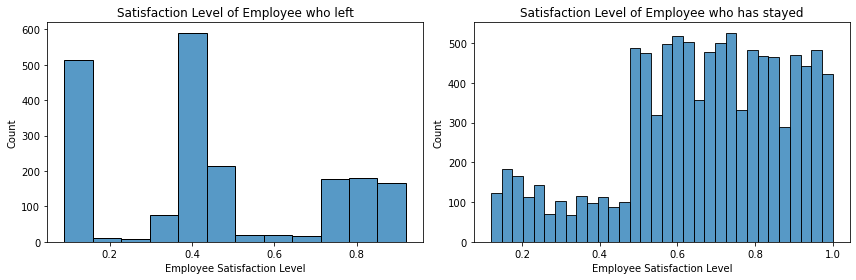

In [29]:
# 1a

# Create a plot as needed
### YOUR CODE HERE ###

# Creating figure plot boxes
fig, axes = plt.subplots(1,2,figsize = (12,4))

sns.histplot(df1_left, x = 'satisfaction_level', ax=axes[0])
axes[0].set_xlabel("Employee Satisfaction Level")
axes[0].set_title("Satisfaction Level of Employee who left")

sns.histplot(df1_stayed, x = 'satisfaction_level', ax=axes[1])
axes[1].set_xlabel("Employee Satisfaction Level")
axes[1].set_title("Satisfaction Level of Employee who has stayed")

plt.tight_layout()
plt.show()

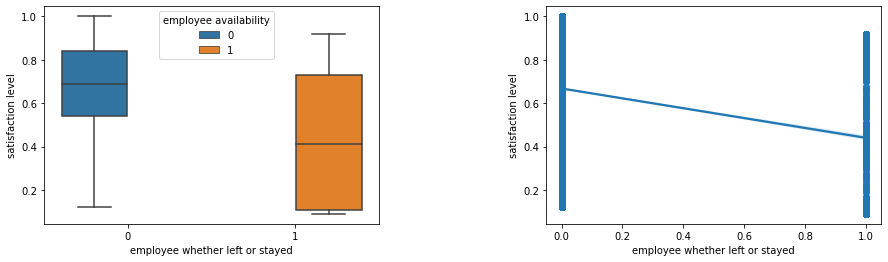

In [30]:
# 1b

# Create a plot as needed
### YOUR CODE HERE ###

# Creating figure plot boxes
fig, axes = plt.subplots(1,2,figsize = (15, 4))

fig.subplots_adjust(wspace=0.5)

sns.boxplot(data=df1, x = 'has_left_company', y = 'satisfaction_level', hue='has_left_company', showfliers = False, ax = axes[0])
axes[0].set_xlabel('employee whether left or stayed')
axes[0].set_ylabel('satisfaction level')
axes[0].legend(title='employee availability', loc='upper right', bbox_to_anchor=(0.7, 1))

sns.regplot(data = df1, x = 'has_left_company', y = 'satisfaction_level', ax = axes[1])
axes[1].set_xlabel('employee whether left or stayed')
axes[1].set_ylabel('satisfaction level')

plt.show()

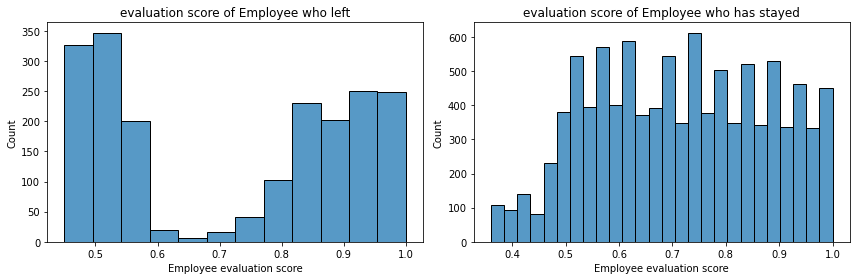

In [31]:
# 2a

# Create a plot as needed
### YOUR CODE HERE ###

# Creating figure plot boxes
fig, axes = plt.subplots(1,2,figsize = (12,4))

sns.histplot(df1_left, x = 'last_evaluation', ax=axes[0])
axes[0].set_xlabel("Employee evaluation score")
axes[0].set_title("evaluation score of Employee who left")

sns.histplot(df1_stayed, x = 'last_evaluation', ax=axes[1])
axes[1].set_xlabel("Employee evaluation score")
axes[1].set_title("evaluation score of Employee who has stayed")

plt.tight_layout()
plt.show()

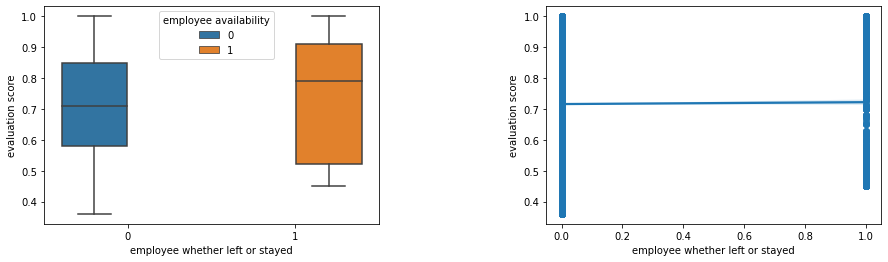

In [32]:
# 2b

# Create a plot as needed
### YOUR CODE HERE ###

# Creating figure plot boxes
fig, axes = plt.subplots(1,2,figsize = (15, 4))

fig.subplots_adjust(wspace=0.5)

sns.boxplot(data=df1, x = 'has_left_company', y = 'last_evaluation', hue='has_left_company', showfliers = False, ax = axes[0])
axes[0].set_xlabel('employee whether left or stayed')
axes[0].set_ylabel('evaluation score')
axes[0].legend(title='employee availability', loc='upper right', bbox_to_anchor=(0.7, 1))

sns.regplot(data = df1, x = 'has_left_company', y = 'last_evaluation', ax = axes[1])
axes[1].set_xlabel('employee whether left or stayed')
axes[1].set_ylabel('evaluation score')

plt.show()

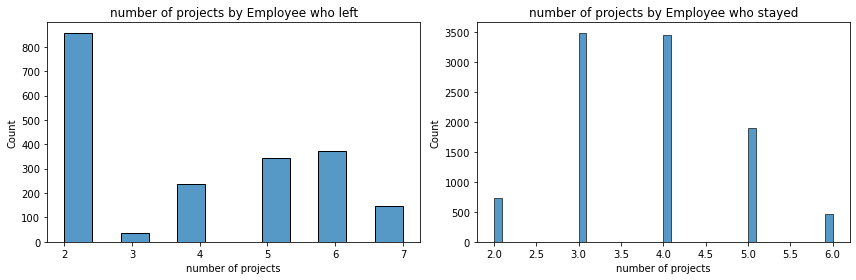

In [33]:
# 3a

# Create a plot as needed
### YOUR CODE HERE ###

# Creating figure plot boxes
fig, axes = plt.subplots(1,2,figsize = (12,4))

sns.histplot(df1_left, x = 'number_project', ax=axes[0])
axes[0].set_xlabel("number of projects")
axes[0].set_title("number of projects by Employee who left")

sns.histplot(df1_stayed, x = 'number_project', ax=axes[1])
axes[1].set_xlabel("number of projects")
axes[1].set_title("number of projects by Employee who stayed")

plt.tight_layout()
plt.show()

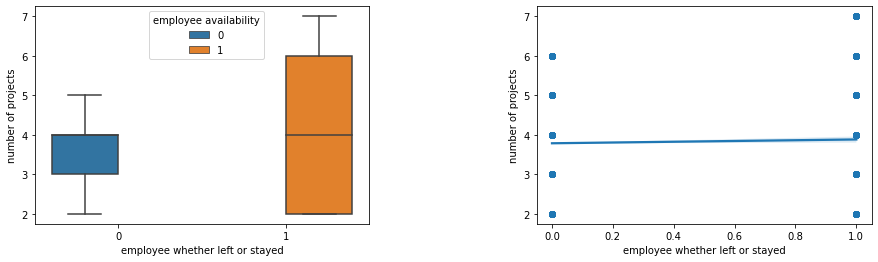

In [35]:
# 3b

# Create a plot as needed
### YOUR CODE HERE ###

# Creating figure plot boxes
fig, axes = plt.subplots(1,2,figsize = (15, 4))

fig.subplots_adjust(wspace=0.5)

sns.boxplot(data=df1, x = 'has_left_company', y = 'number_project', hue='has_left_company', showfliers = False, ax = axes[0])
axes[0].set_xlabel('employee whether left or stayed')
axes[0].set_ylabel('number of projects')
axes[0].legend(title='employee availability', loc='upper right', bbox_to_anchor=(0.7, 1))

sns.regplot(data = df1, x = 'has_left_company', y = 'number_project', ax = axes[1])
axes[1].set_xlabel('employee whether left or stayed')
axes[1].set_ylabel('number of projects')

plt.show()

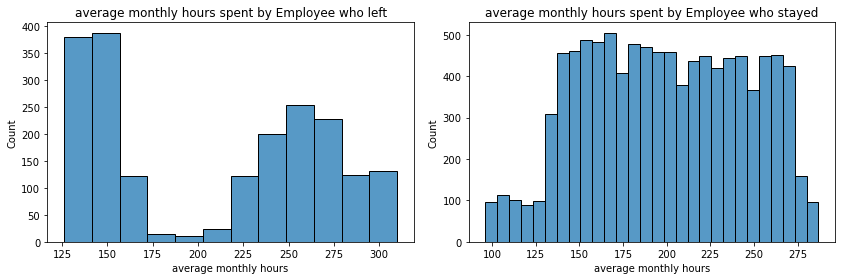

In [36]:
# 4a

# Create a plot as needed
### YOUR CODE HERE ###
fig, axes = plt.subplots(1,2,figsize = (12,4))

sns.histplot(df1_left, x = 'average_monthly_hours', ax=axes[0])
axes[0].set_xlabel("average monthly hours")
axes[0].set_title("average monthly hours spent by Employee who left")

sns.histplot(df1_stayed, x = 'average_monthly_hours', ax=axes[1])
axes[1].set_xlabel("average monthly hours")
axes[1].set_title("average monthly hours spent by Employee who stayed")

plt.tight_layout()
plt.show()

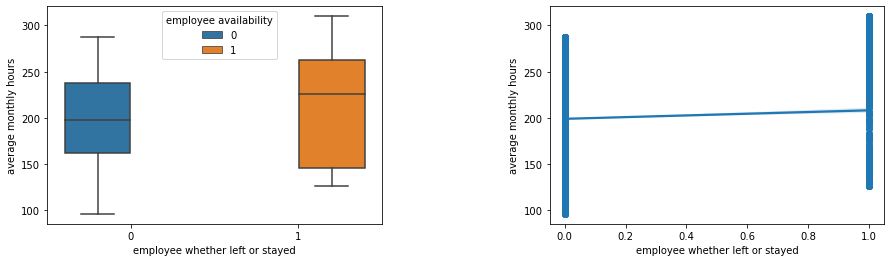

In [37]:
# 4b

# Create a plot as needed
### YOUR CODE HERE ###
fig, axes = plt.subplots(1,2,figsize = (15, 4))

fig.subplots_adjust(wspace=0.5)

sns.boxplot(data=df1, x = 'has_left_company', y = 'average_monthly_hours', hue='has_left_company', showfliers = False, ax = axes[0])
axes[0].set_xlabel('employee whether left or stayed')
axes[0].set_ylabel('average monthly hours')
axes[0].legend(title='employee availability', loc='upper right', bbox_to_anchor=(0.7, 1))

sns.regplot(data = df1, x = 'has_left_company', y = 'average_monthly_hours', ax = axes[1])
axes[1].set_xlabel('employee whether left or stayed')
axes[1].set_ylabel('average monthly hours')

plt.show()

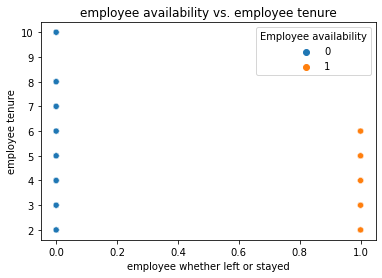

In [38]:
# 5

# Create a plot as needed
### YOUR CODE HERE ###
sns.scatterplot(data = df1, x = 'has_left_company', y = 'time_spend_company', hue = 'has_left_company')
plt.xlabel("employee whether left or stayed")
plt.ylabel("employee tenure")
plt.title("employee availability vs. employee tenure")
plt.legend(title = "Employee availability")
plt.show()

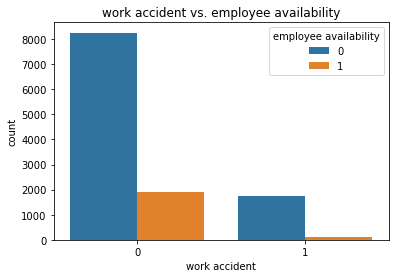

In [39]:
# 6

sns.countplot(data = df1, x = 'work_accident', hue = 'has_left_company')
plt.xlabel("work accident")
plt.title("work accident vs. employee availability")
plt.legend(title = "employee availability")
plt.show()

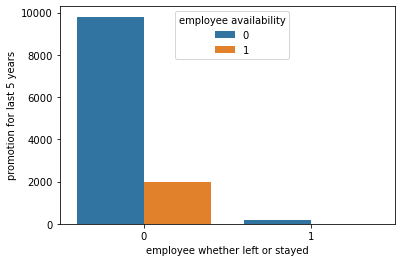

In [40]:
# 7

sns.countplot(data=df1, x = 'promotion_last_5years', hue='has_left_company')
plt.xlabel('employee whether left or stayed')
plt.ylabel('promotion for last 5 years')
plt.legend(title='employee availability', loc='upper right', bbox_to_anchor=(0.7, 1))

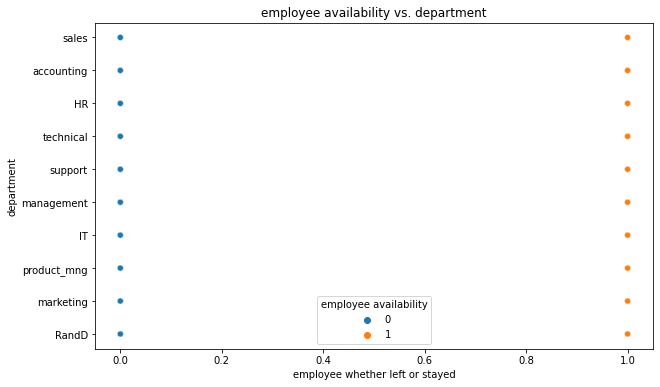

In [41]:
# 8a

plt.figure(figsize = (10,6))
sns.scatterplot(data = df1, x = 'has_left_company', y = 'department', hue = 'has_left_company')
plt.xlabel("employee whether left or stayed")
plt.ylabel("department")
plt.title("employee availability vs. department")
plt.legend(title = "employee availability")
plt.show()

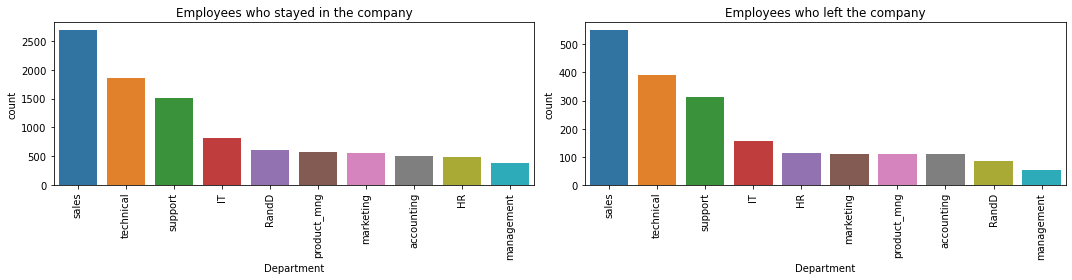

In [42]:
# 8b

order1=df1_stayed['department'].value_counts(ascending=False).index
order2=df1_left['department'].value_counts(ascending=False).index

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.countplot(data=df1_stayed, x='department', order=order1, ax=axes[0])
axes[0].set_xlabel("Department")
axes[0].set_title("Employees who stayed in the company")
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(data=df1_left, x='department', order=order2, ax=axes[1])
axes[1].set_xlabel("Department")
axes[1].set_title("Employees who left the company")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

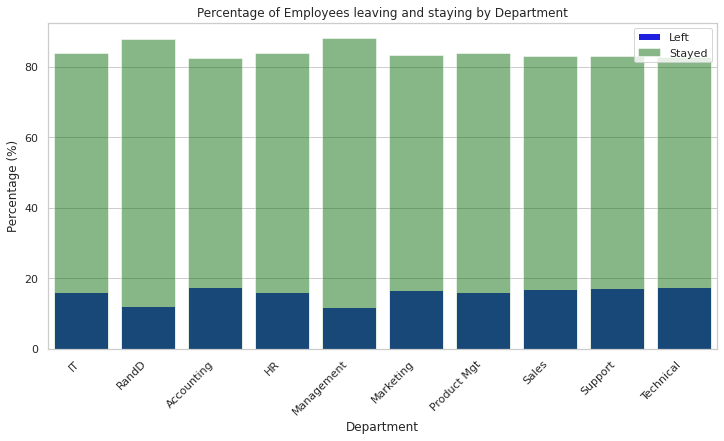

In [43]:
# Visualizing employee availability using the percentage outputs
# Creating the dataframe
data = {'department2':['IT', 'RandD', 'Accounting', 'HR', 'Management', 'Marketing', 'Product Mgt', 'Sales', 'Support', 'Technical'],
'left':[16.2,12.2,17.6,16.2,11.9,16.6,16,17,17.1,17.4],
'stayed':[83.8,87.8,82.4,83.8,88.1,83.4,84,83,82.9,82.6]
}
data = pd.DataFrame(data)
data

# Creating a grouped bar plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Setting the style of the plot

# Plotting the 'left' and 'stayed' data side by side for each department
sns.barplot(x='department2', y='left', data=data, color='blue', label='Left')
sns.barplot(x='department2', y='stayed', data=data, color='green', label='Stayed', alpha=0.5)

plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.xlabel('Department')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Employees leaving and staying by Department')
plt.legend()  # Displaying the legend

plt.show()

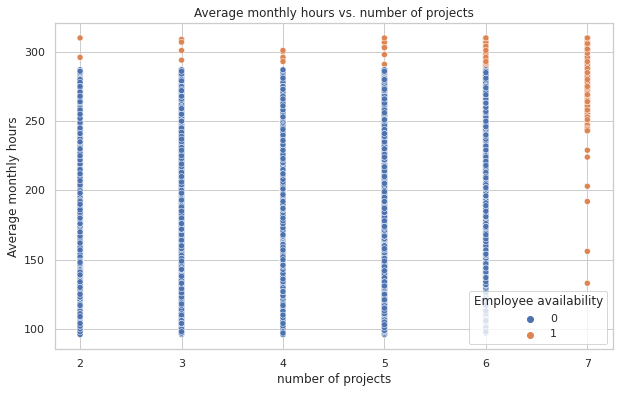

In [44]:
# 9

plt.figure(figsize = (10,6))

sns.scatterplot(data = df1, x = 'number_project', y = 'average_monthly_hours', hue = 'has_left_company')
plt.xlabel("number of projects")
plt.ylabel("Average monthly hours")
plt.title("Average monthly hours vs. number of projects")
plt.legend(title = "Employee availability")
plt.show()

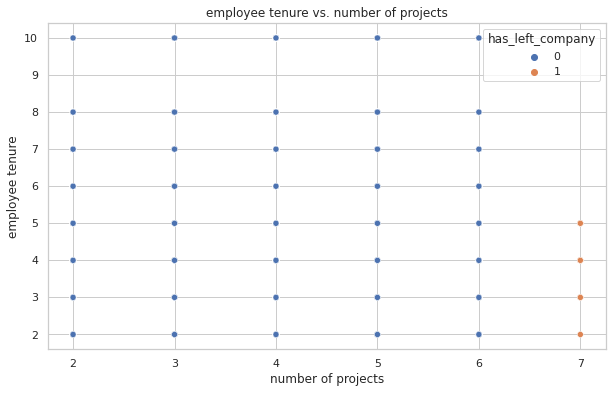

In [45]:
# 10

plt.figure(figsize = (10,6))

sns.scatterplot(data = df1, x = 'number_project', y = 'time_spend_company', hue = 'has_left_company')
plt.xlabel("number of projects")
plt.ylabel("employee tenure")
plt.title("employee tenure vs. number of projects")
plt.show()

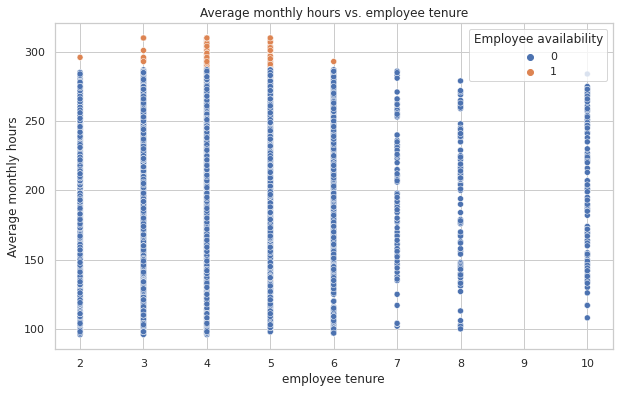

In [46]:
# 11

plt.figure(figsize = (10,6))

sns.scatterplot(data = df1, x = 'time_spend_company', y = 'average_monthly_hours', hue = 'has_left_company')
plt.xlabel("employee tenure")
plt.ylabel("Average monthly hours")
plt.title("Average monthly hours vs. employee tenure")
plt.legend(title = "Employee availability")
plt.show()

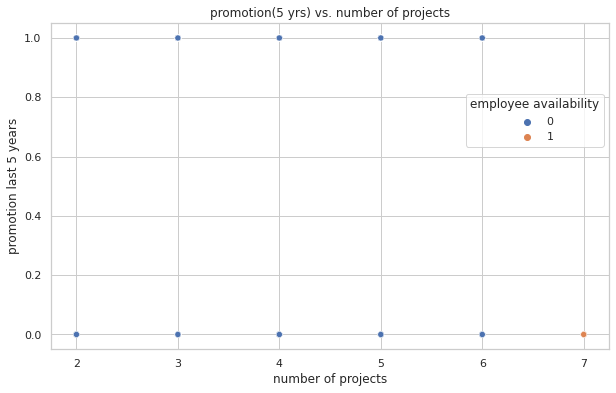

In [47]:
# 12

plt.figure(figsize = (10,6))

sns.scatterplot(data = df1, x = 'number_project', y = 'promotion_last_5years', hue = 'has_left_company')
plt.xlabel("number of projects")
plt.ylabel("promotion last 5 years")
plt.title("promotion(5 yrs) vs. number of projects")
plt.legend(title='employee availability', loc='upper right', bbox_to_anchor=(1, 0.8))
plt.show()

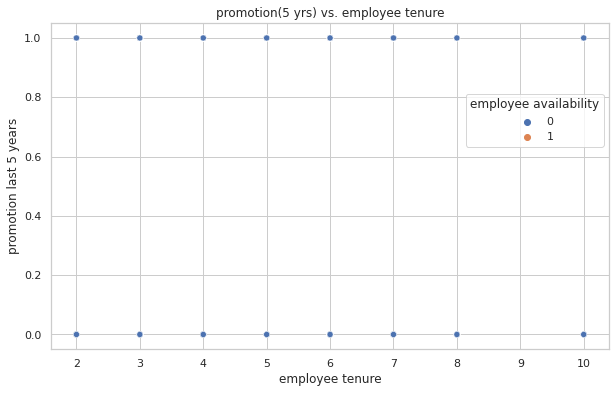

In [48]:
# 13

plt.figure(figsize = (10,6))

sns.scatterplot(data = df1, x = 'time_spend_company', y = 'promotion_last_5years', hue = 'has_left_company')
plt.xlabel("employee tenure")
plt.ylabel("promotion last 5 years")
plt.title("promotion(5 yrs) vs. employee tenure")
plt.legend(title='employee availability', loc='upper right', bbox_to_anchor=(1, 0.8))
plt.show()

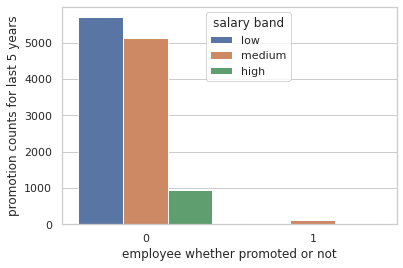

In [49]:
sns.countplot(data=df1, x = 'promotion_last_5years', hue='salary')
plt.xlabel('employee whether promoted or not')
plt.ylabel('promotion counts for last 5 years')
plt.legend(title='salary band', loc='upper right', bbox_to_anchor=(0.7, 1))

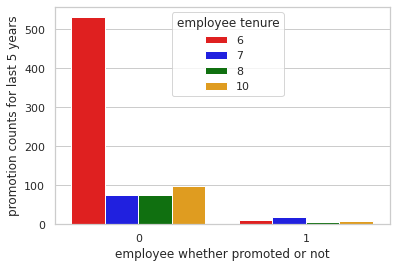

In [50]:
over_5_year_experience = df1[df1['time_spend_company']>5]
data2 = over_5_year_experience

custom_palette = ["red", "blue", "green", "orange"]
sns.countplot(data=data2, x = 'promotion_last_5years', hue='time_spend_company', palette=custom_palette)
plt.xlabel('employee whether promoted or not')
plt.ylabel('promotion counts for last 5 years')
plt.legend(title='employee tenure', loc='upper right', bbox_to_anchor=(0.7, 1))

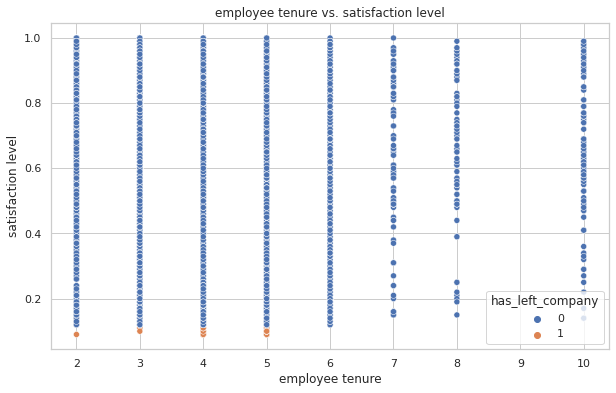

In [51]:
plt.figure(figsize = (10,6))

sns.scatterplot(data = df1, x = 'time_spend_company', y = 'satisfaction_level', hue = 'has_left_company')
plt.xlabel("employee tenure")
plt.ylabel("satisfaction level")
plt.title("employee tenure vs. satisfaction level")
plt.show()

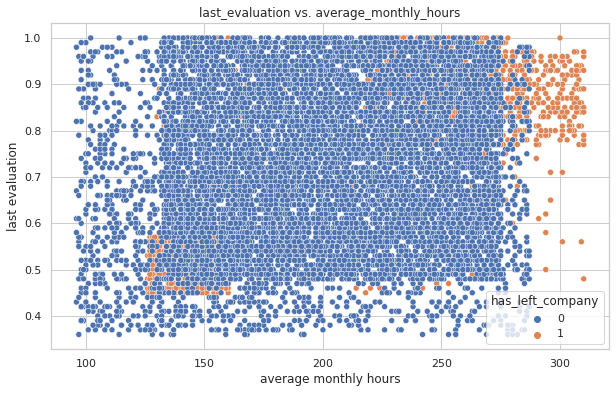

In [52]:
plt.figure(figsize = (10,6))

sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'has_left_company')
plt.xlabel("average monthly hours")
plt.ylabel("last evaluation")
plt.title("last_evaluation vs. average_monthly_hours")
plt.show()

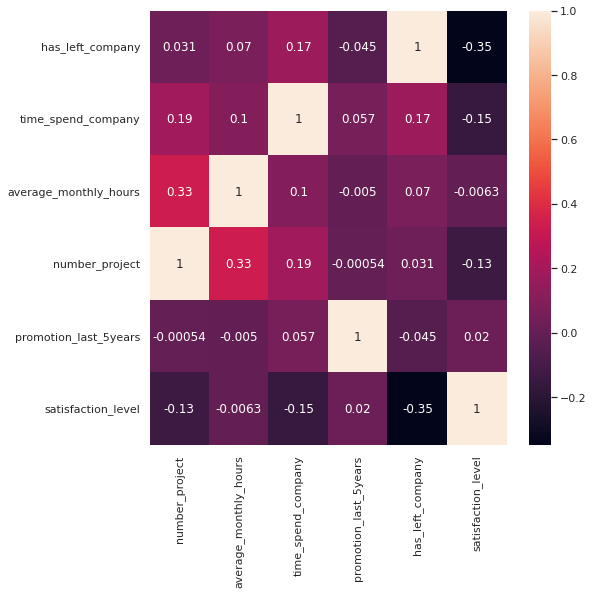

In [53]:
# 14

df2 = df1[['number_project', 'average_monthly_hours', 'time_spend_company', 'promotion_last_5years', \
           'has_left_company', 'satisfaction_level']]
df2_corr = df2.corr().sort_values(by = 'has_left_company', ascending = False)

plt.figure(figsize = (8,8))
sns.heatmap(df2_corr, annot=True)

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]


From the visualization, the following areas which relates to business to employee relationship will be addresed:
1. Employee welfare
2. Employee Promotions and Career Growth
3. Employee Salary and Compensation
4. Employee performance
5. Emnployee Work-life balance
6. Employee Accidents and Safety


1. Employee welfare:  From the visualization, it was discovered that all employees that were involved in 7 projects all left and these categories of employees had experience not more than 5.  for projects of minimum of 2 and maximum of 6, except for employees with 9 years of experience of which were not taken into account, all other categories of employees were involved in these number of projects.  It could be that the employees involved in the 7 projects experienced burn out, little or no support which could have had negative impact on their performance and even wellbeing and this may have warranted them to leave the company.  The same also applies to employees with high average monthly hours spend.  The rate of employee turnover is more pronounced in this area.

2. Employee Promotions and Career Growth: If employees experience slow career growth where the company pay little attention to activities that will improve employee performance, this could discourage performance and possible exit.

3. Employee Salary and Compensation:  With all the work load and no little time over multiple work activities, if employees are not well compensated, they will be forced to look elsewhere.

4. Employee performance:  When employees experience burnout, it can negatively impact their performances.

5. Emnployee Work-life balance:  Also, it could be that most of these employees don't have time for other activities or may be families and friends which probably is affecting their relationships.

6. Employee Accidents and Safety:  Majority of the employees affected here left the company which may indicate that the job has its harzardous effect.  If safety measures are not put in place, it is normal for employees to leave.  Even those that stay behind are likely to leave soonest if nothing is done.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

The type of prediction task here is to predict whether an employee leaves the company.  Leaving or not leaving the company is a categorical outcome variable.  So this task involves classification. More specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

Logistic Regression model:   This model suits the task because it involves binary classification.

For this reason, there will be need to encode the non-numerical variables which are departent and salary.

Both department and salary are categorical variables, for this reason they can be dummied for modelling.  However, salary is ordinal and hierarchy is tagged to it (low, medium, high), hence instead of dummying this column, it is better to convert the levels to numbers (0,1,2).

### Modeling

Add as many cells as you need to conduct the modeling process.

Using logistic regression

For creating a logistic regression model to predict whether or not an employee will leave a company, the following activities are carried out:

1. First, variables that are categorical are encoded

2. Next, outliers are removed.

3. Class balance of the concerned feature in the data is checked

4. The outcome variable is isolated, i.e the concerned feature.  The outcome variable is the variable that is used as the subject of the prediction to be done.  It is denoted as the y variable and it is a data series.

5. The features to be used in the model is selected.  These features are all the variables excluding the outcome variable.  It is denoted as the X variables and it is a dataframe.

6. This dataframe is splitted into two subsets which are the training set and a testing set denoted s 'X_train, y_train' and 'X_test, y_test' respectively.

"
The training set contains a large portion of the data and is typically labeled or annotated. Labeled data means that the input data is paired with the corresponding correct output or target value.  The training set is what will be used to train the model used for the prediction so that the model will be exposed to a variety of input data and their corresponding correct outputs thereby allowing the model to learn patterns, relationships, and features within the data.  The model uses the training set to adjust its internal parameters and develop a predictive function or decision boundary that can map input data to the desired output. This process is known as model training or fitting.

The testing set contains the remaning part of the splitted data.  This is also known as a validation set or evaluation set, it is another subset of the dataset that is kept separate from the training set. It is not used during the model training phase.   The testing set is used to assess the performance and generalization ability of the trained model. It allows you to evaluate how well the model can make predictions on new, unseen data.

The testing set is typically composed of data that the model has never encountered during its training phase. It provides a measure of how well the model can generalize its learning to make accurate predictions or classifications on new, real-world data.  

On this note, there are evaluation metrics used to assess how well the model can make predictions on new data after it has been trained using the training dataset.  These common evaluation metrics used with the testing set include accuracy, precision, recall, F1-score, mean squared error, and many others, depending on the specific problem and the type of machine learning model.
"

7. After splitting the dataframe, the logistic regression model is constructed and then fitted into the training dataset (X_train, y_train)

8. Next is to get predictions on the test set using the logistic regression model.

9. To see how the results of the logistic regression model play, a confusion matrix  is created.

10. finally, a classification report for the logistic regression model is created.

In [55]:
### YOUR CODE HERE ###

# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,has_left_company,promotion_last_5years,salary,department_HR,department_IT,department_RandD,department_accounting,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the tenure column that were identified earlier.

In [59]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['time_spend_company'] >= lower_bound) & (df_enc['time_spend_company'] <= upper_bound)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,has_left_company,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Check the class balance in the data. In other words, check the value counts in the left column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [72]:
df_logreg['has_left_company'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: has_left_company, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, you might want to resample the data to make it more balanced. In this case, you can use this data without modifying the class balance and continue evaluating the model.

Isolate the outcome variable, which is the variable you want your model to predict.

In [61]:
# Isolate the outcome variable
y = df_logreg['has_left_company']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: has_left_company, dtype: int64

Select the features you want to use in your model. Consider which variables will help you predict the outcome variable, left.

In [63]:
# Select the features you want to use in your model
X = df_logreg.drop('has_left_company', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


Split the data into training set and testing set. Don't forget to stratify based on the values in y, since the classes are unbalanced.

In [64]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Construct a logistic regression model and fit it to the training dataset.

In [65]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Test the logistic regression model: use the model to make predictions on the test set.

In [67]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

Create a confusion matrix to visualize the results of the logistic regression model.

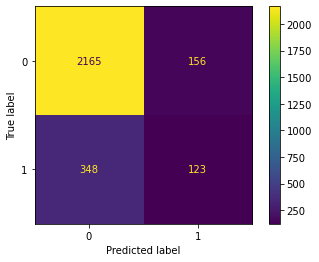

In [70]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

1. The upper-left quadrant displays the number of true negatives. 

2. The upper-right quadrant displays the number of false positives. 

3. The bottom-left quadrant displays the number of false negatives. 

4. The bottom-right quadrant displays the number of true positives.

To plot a confusion matrix (c-matrix), I will need to know the terms which are associated with the c-matrix which are true negatives, false negatives, true positives, and false positives?


Let's determine the true negatives, true  positives, false negatives and false postives.

First of all, the goal of this project is to predict if an employee will leave the company or not.  But I need to know the positive and negative classes.  The outcome I am most interested in  is "employees leaving the company".  Hence, the following:

- Positive class: leaving the company
- Negative class: not leaving the company 

From the above, the following are the terms needed to understand the c-matrix:

- True Positives:  When the activity that an employee will leave the company actually happened which the model accurately predicted is the "True Positives". (If the scenario is such that the model predicts that an employee will leave the company and it happened, this is the "True Positives".)


- False Negatives: When the activity that an employee will leave the company actually happened which the model inaccurately predicted is the "False Negatives". (If the scenario is such that the model predicts that an employee will not leave the company but it did not happened, this is the "False Negatives".)


- True Negatives: When the activity that an employee will not leave the company actually happened which the model accurately predicted is the "True Negatives". (If the scenario is such that the model predicts that an employee will not leave the company and it happened, this is the "True Negatives".)


- False Positives: When the activity that an employee will not leave the company actually happened which the model inaccurately predicted  is the "False Psitives". (If the scenario is such that the model predicts that an employee will leave the company but it did not happened, this is the "False Positives".)

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [73]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.


- Precision (Positive Predictive Value): Precision is a measure of the model's accuracy when it predicts the positive class. In this case, the model achieved a precision of 79%. This means that when the model predicted that an employee would leave the company, it was correct about 79% of the time.

- Recall (Sensitivity or True Positive Rate): Recall is a measure of the model's ability to correctly identify all instances of the positive class in the dataset. In this case, the model achieved a recall of 82%. This means that the model successfully identified 82% of the employees who actually left the company.

- F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this case, the model achieved an F1-score of 80%, which suggests a good balance between precision and recall.

- Accuracy: Accuracy is a measure of the overall correctness of the model's predictions. In this case, the model achieved an accuracy of 82%, indicating that 82% of all predictions made by the model were correct.

A heatmap to show how the variables correlate is created.  Binary variables are excluded.

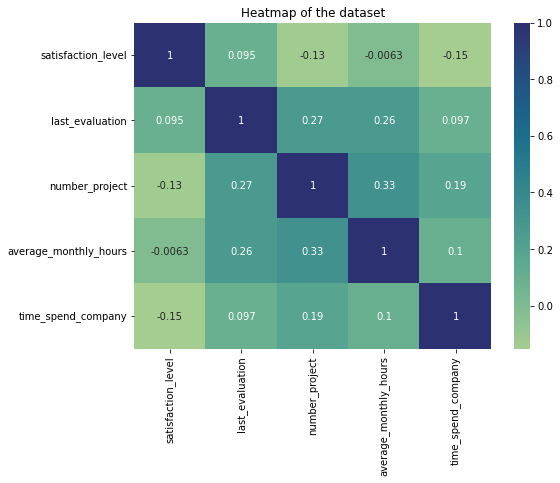

In [55]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In the above heatmap, higher values indicate a significant correlation strength between two variables which also indicates darker colors.  For example, we see that there is a strong correlation between the number of projects contributed and the average monthly hours spent by employees which indicate that these employees are been over worked which may have led to some exits.

A stacked bar plot to visualize the amount of employees across department, comparing those who left with those who stayed is created

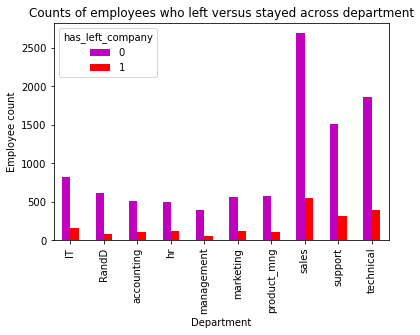

In [56]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['has_left_company']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

The logistic regression model achieved precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%, on the test set.

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]


CONCLUSIONS

The models and the feature importances extracted from the models confirm that employees at the company are experiencing the following which impacts negatively on their performance thereby warranting exits from the company except in some few cases:

1. Being overworked.

2. Exposed to unfavorable working conditions.

3. Biased treatment with regards to promotion and recognition.


RECOMMENDATIONS AND NEXT STEPS

To retain employees, the following recommendations could be presented to the stakeholders:

Employees should be aware of the number of projects they are expected to contribute to.  Even though it has been stated on the contract of agreement, it should be minimised.  The company should cap the number of projects that employees can work on.

From the scatter plot of "employee tenure" against "satisfaction level", we see that employees who have been with the company from 2 years to 5 years are dissatisfied.  Four years at least is something enough to put in most of one's time and energy within a work space and should be recognised.  The company should consider promoting employees who have been with the company for at least four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.

Working extra hours should be voluntary with pay conditions according to hours spent.  Employees shouldn't be forced to work extra hours and should not be evaluated if the extra work activities has no need for such, and I believe promotion should not be based on the amount of hours spent by employees but rather impact made by projects rendered by the employees.

Employees at the time of signing contract of agreement, should be aware of the company work culture including health, safety, time factors and must have undergone some series of on-boarding or training to experience first hand  work activities.

At times new development may arise as business demands, and these developments may affect factors such as work hours which can lead to overtime pay policies, etc.  This scenarios should be stated clearly during contract of agreement so that the employees will be aware of them before hand.

From the scatter plot of 'last evaluation' and 'average monthly hours', there is high influx of people who worked 200+ hours leaving the company even though a high percentage of them had high evaluation score as even some who worked 200+ hours still had low evaluation score which could be discouraging.  Even if there are reasons that warrant for these low scores, there should be a rational explanation why these set of workers had low score compared to the others.  On this note, company should endeavour to investigate why some employees are not performing well as expected and reduce the hours spent or provide stipends or bonuses for extra hours spent during work activities.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.